In [22]:
from enmspring.k_b0_plot import CorrelationPlot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rootfolder = '/home/yizaochen/codes/dna_rna/fluctmatch_sequence'
cutoff = 4.7

### Part 0: Initialize

In [2]:
corre_type = 'mean' # 'mean' or 'median' 

plot_agent = CorrelationPlot(rootfolder, cutoff, corre_type)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/ctct_21mer/bdna+bdna/pd_dfs exists
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/gcgc_21mer/bdna+bdna/pd_dfs exists
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/g_tract_21mer/bdna+bdna/pd_dfs exists
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/atat_21mer/bdna+bdna/pd_dfs exists
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/tgtg_21mer/bdna+bdna/pd_dfs exists


In [3]:
plot_agent.d_df['a_tract_21mer']

,PairID,PairType,Big_Category,Strand_i,Resid_i,Atomname_i,Atomid_i,Strand_j,Resid_j,Atomname_j,Atomid_j,k,b0
759,760,same-P-P-0,backbone,STRAND1,4,P,61,STRAND1,4,O1P,62,14.0529,1.3555
760,761,same-P-P-0,backbone,STRAND1,4,P,61,STRAND1,4,O2P,63,26.4928,1.3820
761,762,same-P-P-0,backbone,STRAND1,4,P,61,STRAND1,4,O5',64,19.4255,1.4874
762,763,same-P-P-0,backbone,STRAND1,4,P,61,STRAND1,4,C5',65,3.7892,2.4573
766,767,same-P-S-0,backbone,STRAND1,4,P,61,STRAND1,4,C2',80,0.0515,4.5882
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8619,8620,Within-Ring,other,STRAND2,18,C2,791,STRAND2,18,O2,792,186.2258,1.2014
8621,8622,same-S-B-0,sugar,STRAND2,18,C2,791,STRAND2,18,C2',794,1.4865,3.5113
8643,8644,same-S-S-0,sugar,STRAND2,18,C3',793,STRAND2,18,C2',794,53.1270,1.4639
8644,8645,same-P-S-0,backbone,STRAND2,18,C3',793,STRAND2,18,O3',795,51.3534,1.3575


### Part 1: Single Correlation Plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


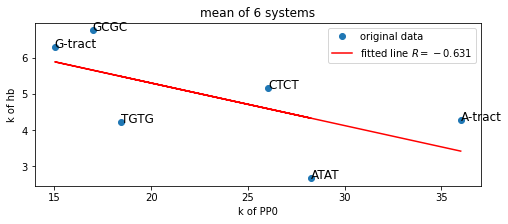

In [12]:
pairtype_x = 'PP0'
pairtype_y = 'hb'

fig, ax = plt.subplots(figsize=(8, 3))
coefs = plot_agent.plot_single_one_curve(ax, pairtype_x, pairtype_y)

#plt.savefig(f'{pairtype_x}_{pairtype_y}.eps')
plt.show()

### Part 2: Write Heatmap array

In [3]:
#heatmap_array = plot_agent.write_heatmap_array()

Write Heatmap array to /home/yizaochen/codes/dna_rna/fluctmatch_sequence/metadata/heatmap_array.npy


In [ ]:
heatmap_array = plot_agent.read_heatmap_array()

### Part 3-1: Draw Heatmap v1

Read Heatmap array from /home/yizaochen/codes/dna_rna/fluctmatch_sequence/metadata/heatmap_array.npy


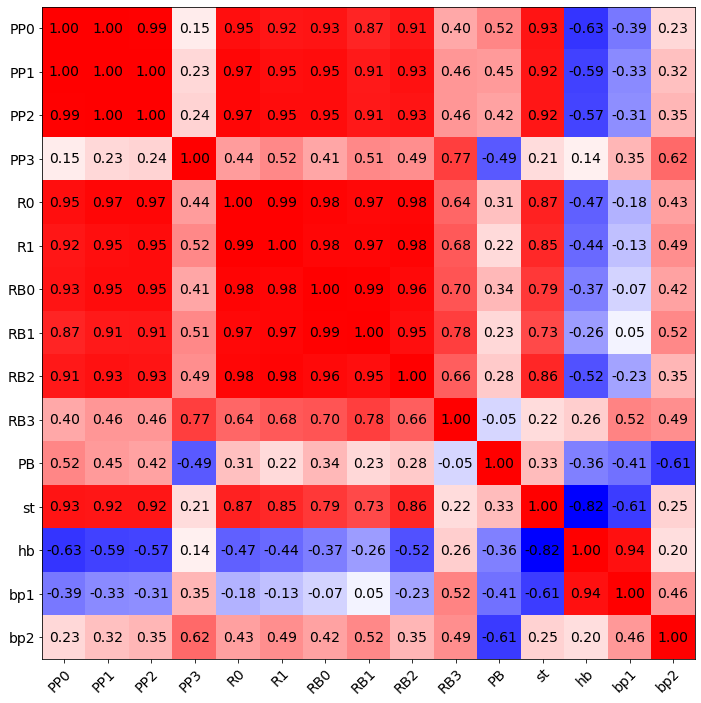

In [10]:
fig, ax = plt.subplots(figsize=(12, 12))

plot_agent.heatmap_pearson_coefficient(ax, textcolor='black')
#plt.savefig(f'heatmap_{corre_type}.svg')
#plt.savefig(f'heatmap_{corre_type}.eps')
plt.show()

### Part 3-2: Draw Heatmap v2

In [28]:
#matrix = np.triu(heatmap_array,k=1)
#sns.heatmap(heatmap_array, vmin=-1, vmax=1, annot=True, fmt='.2g', cmap='coolwarm', cbar=False, mask=matrix)

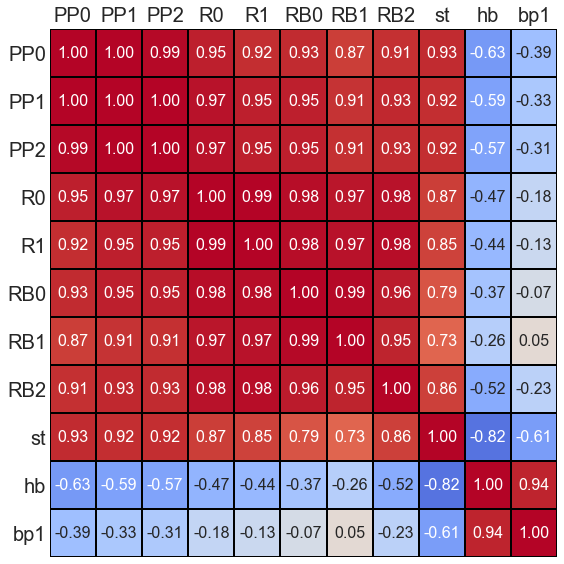

In [53]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(heatmap_array, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm', cbar=False, linewidths=1, linecolor='black', annot_kws={'fontsize':16})

# xtick
ax.set_xticklabels(plot_agent.subcategories)
ax.xaxis.tick_top()
ax.tick_params(axis='x', labelrotation=0, labelsize=20, length=0)


# ytick
ax.set_yticklabels(plot_agent.subcategories)
ax.tick_params(axis='y', labelrotation=0, labelsize=20, length=0)

plt.tight_layout()
#plt.savefig('localk_correplot.png', dpi=300)
plt.show()